### <font color='red'>Binary Logistic Regression, i.e., two-class classification</font>

* Predict the probability of a categorical dependent variable
* The dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). 
* In other words, the logistic regression model predicts P(Y=1) as a function of X.

#### Logistic Regression Assumptions
* Binary logistic regression requires the dependent variable to be binary.
* For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
* Only the meaningful variables should be included.
* The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
* The independent variables are linearly related to the log odds.
* Logistic regression requires quite large sample sizes.

### Introduction to logistic regression

A **logistic regression** is a model that predicts the probability of an outcome in a binary category using an equation of the form $ \mathbf{\hat{p}\ =\ \frac{e^{b_0+b_1x}}{1\ +\ e^{b_0+b_1x}}} $, where $ \mathbf{b_0} $ and $ \mathbf{b_1} $ are values estimated using the data. A logistic regression model graphs an S-shaped curve (a sigmoid). Although a logistic regression model is an example of nonlinear regression, the parameters $ \mathbf{b_0} $ and $ \mathbf{b_1} $ play a role similar to the parameters of simple linear regression and use the same names.

- $ \mathbf{b_0} $ is called the intercept parameter. Unlike linear regression, the $ \mathbf{b_0} $ is not the y-intercept, but instead determines probability of observing a success when all the input features are 0, or baseline success probability. A positive value of  indicates a probability greater than 0.5 while a negative value of  indicates a probability less than 0.5.<br>
- $ \mathbf{b_1} $ is the slope parameter that determines how sharply the logistic curve bends as the value of the input feature increases. A positive slope parameter means the curve will increase from 0 to 1 as the input feature increases, while a negative slope parameter indicates the curve will decrease from 1 to 0 as the input feature increases.

### Linear Regression vs Logistic Regression

* In Linear Regression, the output is the weighted sum of inputs. 
* Logistic Regression doesn't output the weighted sum of inputs directly, but passes it through an activation function that can map any real value between 0 and 1.


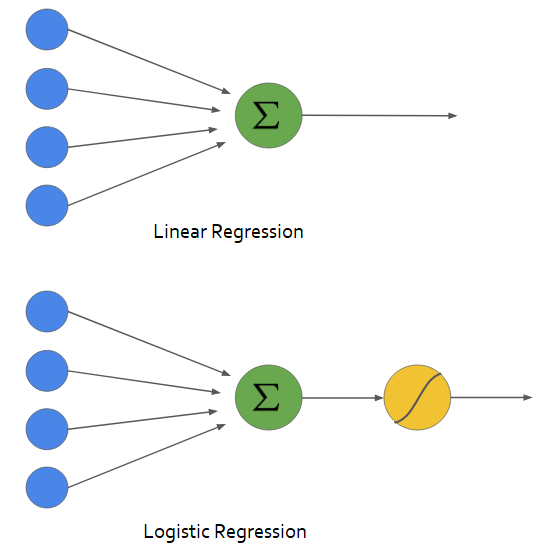

* The activation function that is used is known as the sigmoid function. The basic sigmoid function is called logistic function. It looks like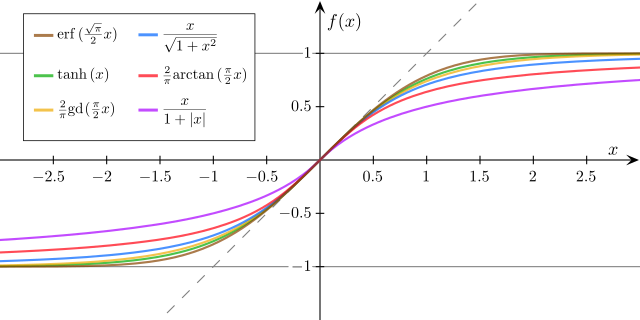

* The value is exactly 0.5 at X=0. We can use a probability threshold to determine the classes. If the probability is greater than the thareshold, we classify it as Class-1(Y=1) or else as Class-0(Y=0).


### Classification using a logistic regression

Although more complicated, using nonlinear equations allows a broader class of scenarios to be modeled. One such scenario is classification: a nonlinear regression model can be used to predict the outcome of a categorical feature based on numeric features. In order to do so, categorical features must first be made numeric. **Hot encoding** is transforming a categorical feature into numeric feature that equal 0 when an instance is not in the category and 1 when the instance is.

A binary categorical feature hot encoded into a numeric feature $ \mathbf{p} $ can be interpreted as a probability where the outcomes are either 0% or 100% chance of being in the category. When the predicted probability $ \mathbf{\hat{p}} $ is greater than some cutoff value, the outcome is predicted to be in the category, otherwise the outcome is predicted to not be in the category. The cutoff value is based on the scenario being modeled, but usually 0.5 is used in classification.

**Hot encoding the diagnosis feature from the Wisconsin breast cancer diagnosis dataset.**
Malignant tumors are hot-encoded as 1 and benign tumors are hot encoded as 0. The predicted probability  for each tumor is obtained using the logistic regression model
$$ \mathbf{\hat{p}\ =\ \frac{e^{-15.12+1.02(radius\ mean)}}{1\ +\ e^{-15.12+1.02(radius\ mean)}}} $$

Using a probability cutoff of 0.5, tumors with predicted probabilities greater than or equal to 0.5 will be classified as 1. Tumors with predicted probabilities less than 0.5 will be classified as 0.

| Radius mean	| Diagnosis	| Observed class, $ \mathbf{p} $ 	| Predicted probability, $ \mathbf{\hat{p}} $	| Predicted class |
| :------------ | :------:  | :------:          | :-------: | :-----: |
| 17.99	| M	| 1	| 0.965	| 1 |
| 20.57	| M	| 1	| 0.997	| 1 |
| 19.69	| M	| 1	| 0.994	| 1 |
| 11.42	| M	| 1	| 0.032	| 0 |
| ...	| ...	| ...	| ... | 
| 20.60	| M	| 1	| 0.998	| 1 |
| 7.76	| B	| 0	| 0.001	| 0 |


### Logistic regression in Python

Python can carry out logistic regression by fitting a **LogisticRegression()** object to $ \mathbf{(X,y)} $ where $ \mathbf{X} $ is an array of the observed values of the input feature and $ \mathbf{y} $ is an array of 0s and 1s representing the binary categorical variable. The parameters and methods for LogisticRegression() can be found in the LogisticRegression documentation. If the categorical variable has not been hot encoded, values can be reassigned from labels to 0 or 1 using pandas DataFrame operations.



In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

[WisconsinBreastCancerDatabase.csv](https://drive.google.com/file/d/1qQ-s6KCn64KzCEvinzHgm7iLa_WqWaAy/view?usp=sharing)

In [5]:
# Load the Wisconsin Breast Cancer dataset
WBCD = pd.read_csv("data/WisconsinBreastCancerDatabase.csv")
# Convert Diagnosis to 0 and 1.
WBCD.loc[WBCD['Diagnosis'] == 'B', 'Diagnosis'] = 0
WBCD.loc[WBCD['Diagnosis'] == 'M', 'Diagnosis'] = 1
WBCD


,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# Store relevant columns as variables
X = WBCD[['Radius mean']].values.reshape(-1, 1)
y = WBCD[['Diagnosis']].values.reshape(-1, 1).astype(int)

Text(0, 0.5, 'Probability of malignant tumor')

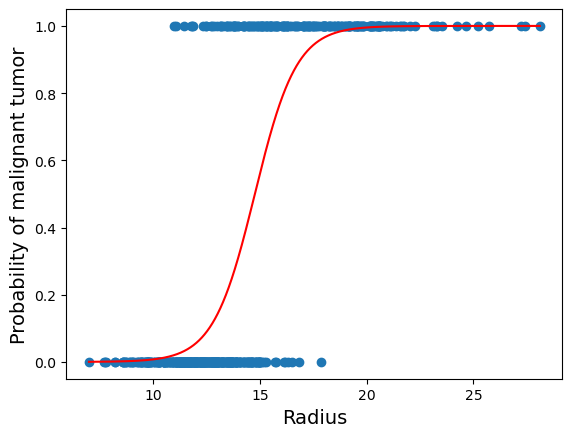

In [6]:
# Logistic regression predicting diagnosis from tumor radius
logisticModel = LogisticRegression()
logisticModel.fit(X, np.ravel(y.astype(int)))

# Graph logistic regression probabilities
plt.scatter(X, y)
xDelta = np.linspace(X.min(), X.max(), 10000)
yPredicted = logisticModel.predict(X).reshape(-1, 1).astype(int)
yDeltaProb = logisticModel.predict_proba(xDelta.reshape(-1, 1))[:, 1]
plt.plot(xDelta, yDeltaProb, color='red')
plt.xlabel('Radius', fontsize=14)
plt.ylabel('Probability of malignant tumor', fontsize=14)

In [6]:
# Display the slope parameter estimate
logisticModel.coef_

array([[1.02475609]])

In [7]:
# Display the intercept parameter estimate
logisticModel.intercept_

array([-15.120902])

In [8]:
# Predict the probability a tumor with radius mean 13 is benign / malignant
pHatProb = logisticModel.predict_proba([[13]])
pHatProb[0]

array([0.85803604, 0.14196396])

In [9]:
# Classify whether tumor with radius mean 13 is benign (0) or malignant (1)
pHat = logisticModel.predict([[13]])
pHat[0]

0

In [10]:
print(
    "A tumor with radius mean 13 has predicted probability: \n",
    pHatProb[0][0],
    "of being benign\n",
    pHatProb[0][1],
    "of being malignant\n",
    "and overall is classified to be benign",
)

A tumor with radius mean 13 has predicted probability: 
 0.8580360397250102 of being benign
 0.14196396027498978 of being malignant
 and overall is classified to be benign
